In [1]:
%pip install -U sentence-transformers scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

c:\Users\aneel\.conda\envs\nlp-faiss\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = SentenceTransformer('all-MiniLM-L6-v2')

c:\Users\aneel\.conda\envs\nlp-faiss\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aneel\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back

In [4]:
sentences = [
    "How's the weather today?",
    "What's the temperature like outside?",
    "Will it rain tomorrow?",
    "Tell me a joke.",
    "I love eating pizza.",
    "Can you recommend a movie?",
    "Is it sunny right now?",
    "Let's go for a walk.",
    "The forecast says it will snow.",
    "Who won the game last night?"
]


In [5]:
embeddings = model.encode(sentences)

In [6]:
similarity_matrix = cosine_similarity(embeddings)

# Print similarity between each pair
for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        print(f"Similarity between:\n  \"{sentences[i]}\"\n  and \"{sentences[j]}\" = {similarity_matrix[i][j]:.2f}\n")

Similarity between:
  "How's the weather today?"
  and "What's the temperature like outside?" = 0.61

Similarity between:
  "How's the weather today?"
  and "Will it rain tomorrow?" = 0.55

Similarity between:
  "How's the weather today?"
  and "Tell me a joke." = 0.22

Similarity between:
  "How's the weather today?"
  and "I love eating pizza." = 0.10

Similarity between:
  "How's the weather today?"
  and "Can you recommend a movie?" = 0.07

Similarity between:
  "How's the weather today?"
  and "Is it sunny right now?" = 0.57

Similarity between:
  "How's the weather today?"
  and "Let's go for a walk." = 0.17

Similarity between:
  "How's the weather today?"
  and "The forecast says it will snow." = 0.42

Similarity between:
  "How's the weather today?"
  and "Who won the game last night?" = 0.32

Similarity between:
  "What's the temperature like outside?"
  and "Will it rain tomorrow?" = 0.33

Similarity between:
  "What's the temperature like outside?"
  and "Tell me a joke." =

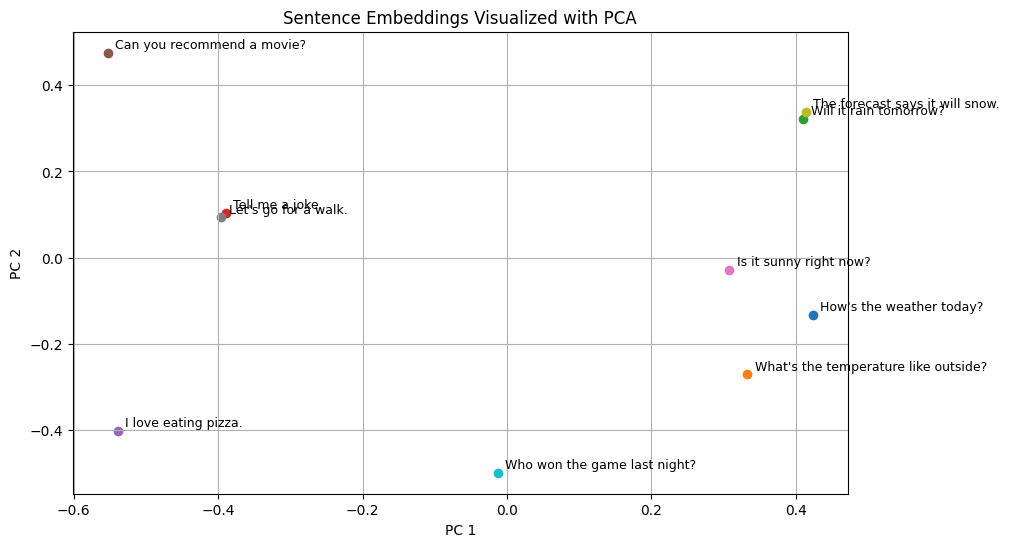

In [7]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
for i, sentence in enumerate(sentences):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, sentence, fontsize=9)

plt.title("Sentence Embeddings Visualized with PCA")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()


## Task 2: FAISS for Similarity Search

In [ ]:
%pip install faiss-cpu

In [10]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

In [11]:
text_chunks = [
    "The Eiffel Tower is located in Paris, France.",
    "The Great Wall of China stretches over 13,000 miles.",
    "The capital of Japan is Tokyo.",
    "Python is a popular programming language for data science.",
    "Pandas is a library used for data manipulation in Python.",
    "Mount Everest is the tallest mountain in the world.",
    "The Taj Mahal was built in the 17th century in India.",
    "The Amazon rainforest is the largest tropical rainforest.",
    "Basketball is a sport played between two teams of five players.",
    "Water boils at 100 degrees Celsius at sea level."
]

In [12]:
model = SentenceTransformer('all-MiniLM-L6-v2')
chunk_embeddings = model.encode(text_chunks)


In [13]:
dimension = chunk_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(chunk_embeddings))


In [14]:
queries = [
    "Where is the Eiffel Tower?",
    "What city is the Eiffel Tower in?",
    "Tell me the location of the Eiffel Tower."
]

query_embeddings = model.encode(queries)


In [15]:
top_k = 3

for i, query in enumerate(queries):
    print(f"\nQuery {i+1}: {query}")
    D, I = index.search(np.array([query_embeddings[i]]), top_k)

    for rank, idx in enumerate(I[0]):
        print(f"  Rank {rank+1}: {text_chunks[idx]} (distance: {D[0][rank]:.2f})")



Query 1: Where is the Eiffel Tower?
  Rank 1: The Eiffel Tower is located in Paris, France. (distance: 0.29)
  Rank 2: The Great Wall of China stretches over 13,000 miles. (distance: 1.55)
  Rank 3: Mount Everest is the tallest mountain in the world. (distance: 1.60)

Query 2: What city is the Eiffel Tower in?
  Rank 1: The Eiffel Tower is located in Paris, France. (distance: 0.31)
  Rank 2: The Great Wall of China stretches over 13,000 miles. (distance: 1.58)
  Rank 3: Mount Everest is the tallest mountain in the world. (distance: 1.62)

Query 3: Tell me the location of the Eiffel Tower.
  Rank 1: The Eiffel Tower is located in Paris, France. (distance: 0.32)
  Rank 2: The Great Wall of China stretches over 13,000 miles. (distance: 1.48)
  Rank 3: Mount Everest is the tallest mountain in the world. (distance: 1.51)
